 <h1 style="background-color:white
;font-family:Arial Black;font-size:225%;text-align:center;border-radius: 15px 50px;">  🏘️ House Sales Regression 🏘️  </h1><a id=0></a>

# ![](https://media.giphy.com/media/l0IylQoMkcbZUbtKw/giphy.gif)

<font color = '#F08841'>
Content:
    
1. [Loading and Checking Data](#1)
1. [Data Preprocessing](#2)
1. [Creating Models](#3)
    *          [Linear Regression ](#4)
    *          [Polynomial Regression ](#5)
    *          [SVR (Support Vector Regression) ](#6)
    *          [Decision Tree  ](#7)
    *          [Random Forest ](#8)
1. [Conclusion](#9)
1. [A Little Note](#10)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

 <a id = "1"></a><br>
 # Loading and Checking Data

In [ ]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
df.head(10)

There is  an 'id' column. In data preprocessing, I will drop it because the id column does not positively affect model.

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

There is no null data, good.

In [ ]:
df.describe()

In [ ]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
df.corr()["price"].sort_values(ascending=False)

The variable that affects the price the most is 'sqft_living' with +0.70 correlation value.

<a id = "2"></a><br>
# Data Preprocessing

In [ ]:
df = df.drop(["id"],axis=1)
df.head()

The 'id' column is meaningless for this problem so, I dropped it. Also, the 'date' column is non-numeric, but I don't want to drop it so I'll split it into 3 parts, 'day', 'month' and 'year'.The last thing I will do is: I will not remove the 'zipcode' column because after I finished the whole process, I removed it and checked the performance of the models, I get better results with the 'zipcode' column.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)

df.head(10)

I split the 'date' column into 'year', 'month' and 'day' columns.
These columns are located on the far right. Then I dropped the 'date' column.

In [ ]:
sns.distplot(df['price'])

It looks like a Normal Distribution, but on the right there is some data that distorts the distribution (shown in yellow in the picture). 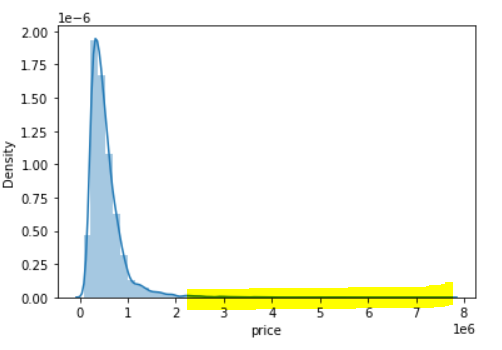 I'll drop some of it

It is enough to drop 1% of the total data.

In [ ]:
len(df)*0.01

I found the number of rows to drop. So, 216 rows will be dropped.

In [ ]:
df = df.sort_values(['price'], ascending=False).iloc[216:]
df.head()

In this way, some of the data that adversely affected the normal distribution was removed.

In [ ]:
sns.distplot(df['price'])

We got a 'more' normal distribution, nice.

In [ ]:
df.describe()

Changes in mean price and number of rows appear after some data is removed.

Data preparation is done, let's move on to creating the models.

<a id = "3"></a><br>
# Creating Models

In [ ]:
# Creating X and Y (features and labels)
x = df.iloc[:,1:]
y = df.iloc[:,0:1]
X = x.values
Y = y.values

In [ ]:
from sklearn.metrics import r2_score

Since I will look at the r2_score after creating each model, I imported the r2_score here, at the beginning.

<a id = "4"></a><br>
## Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)


print(f'R² score: {r2_score(Y, lin_reg.predict(X))*100}')

In [ ]:
#Linear - Regression Graph
predictArray_lin = lin_reg.predict(X)
plt.scatter(Y,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

<a id = "5"></a><br>
## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)


print(f'R² score: {r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))*100}')

In [ ]:
# Polynomial - Regression Graph
predictArray_poly = lin_reg2.predict(poly_reg.fit_transform(X)) 
plt.scatter(Y,predictArray_poly, color="b")
plt.plot(Y,Y, color="r")

<a id = "6"></a><br>
## SVR (Support Vector Regression)

Unlike other models, SVR receives the data as scaled.

In [ ]:
#scaling the data

from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_scaled = sc1.fit_transform(X)

sc2=StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

The kernel function that will give the highest performance for this problem is 'rbf'.

In [ ]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_scaled,y_scaled)

print(f'R² score: {r2_score(y_scaled, svr_reg.predict(x_scaled))*100}')



In [ ]:
#SVR - Regression Graph
predictArray_svr = svr_reg.predict(x_scaled)
plt.scatter(y_scaled,predictArray_svr, color="b")
plt.plot(y_scaled,y_scaled, color="r") 

<a id = "7"></a><br>
## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

print(f'R² score: {r2_score(Y, r_dt.predict(X))*100}')


In [ ]:
#Decision Tree - Regression Graph
predictArray_dt = r_dt.predict(X)
plt.scatter(Y,predictArray_dt, color="b")
plt.plot(Y,Y, color="r")

<a id = "8"></a><br>
## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')


In [ ]:
#Random Forest - Regression Graph
predictArray_rf = rf_reg.predict(X)
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color="r")

<a id = "9"></a><br>
# Conclusion

In [ ]:
#Creation of R² scores
r2_lin = r2_score(Y, lin_reg.predict(X))*100
r2_poly = r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))*100
r2_SVR = r2_score(y_scaled, svr_reg.predict(x_scaled))*100
r2_dt = r2_score(Y, r_dt.predict(X))*100
r2_rf = r2_score(Y, rf_reg.predict(X))*100

In [ ]:
# Regression Graphs - Subplot
plt.figure(figsize=(16,12),facecolor='#9DF08E')
plt.subplot(2,3,1)
plt.scatter(Y,predictArray_lin, color='b')
plt.plot(Y,Y, color='r')
plt.title('Linear Reg.', color='r')

plt.subplot(2,3,2)
plt.scatter(Y,predictArray_poly, color='b')
plt.plot(Y,Y, color='r')
plt.title('Polynomial Reg.', color='r')

plt.subplot(2,3,3)
plt.scatter(y_scaled,predictArray_svr, color="b")
plt.plot(y_scaled,y_scaled, color="r") 
plt.title('SVR Reg.', color='r')

plt.subplot(2,3,4)
plt.scatter(Y,predictArray_dt, color="b")
plt.plot(Y,Y, color='r')
plt.title('Decision Tree', color='r')

plt.subplot(2,3,5)
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color='r')
plt.title('Random Forest', color='r')

In [ ]:
#Printing R² scores
print("------------- R² SCORES OF MODELS ----------------\n")
print(f'Linear Regression R² Score     : {r2_lin}')
print(f'Polynomial Regression R² Score : {r2_poly}')
print(f'SVR R² Score                   : {r2_SVR}')
print(f'Decision Tree R² Score         : {r2_dt}')
print(f'Random Forest R² Score         : {r2_rf}')

In [ ]:
#Bar Graph Display of R² Scores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparison of Models' R² Score", color='r')
ax.set_xlabel('Model Name', color='g')
ax.set_ylabel('R² Score', color='g')
models_names = ['Linear Reg.', 'Polynomial Reg.', 'SVR', 'Decision Tree', 'Random Forest']
models_r2s = [r2_lin,r2_poly,r2_SVR,r2_dt,r2_rf]
ax.bar(models_names, models_r2s,color="#2DC100")
plt.show()

# Comments on the result
Although Decision Tree has the highest R² score (99.99), I think the most successful model for regression of this dataset is 'Random Forest'. Because 99.99 is such a perfect score it shouldn't be, there may be a mistake somewhere.

Also, The variable that affects the price the most is 'sqft_living' with +0.70 correlation value.


<a id = "10"></a><br>
# A Little Note

<h1 style="background-color:#10DEFF
;font-family:Comic Sans MS;font-size:225%;text-align:center;border-radius: 15px 50px;"> 📊 Thank you all for reading. If you like it, upvote please and leave feedback. It would really help me to learn new things and develop my skills. 😃 </h1><a id=note></a>